**ANDREA KOUADIO ET MOUBARAK LASSISSI M2 IS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from scipy.interpolate import BSpline
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

In [2]:
X_train = pd.read_csv('xtrain.csv')
Y_train = pd.read_csv('ytrain.csv')
X_test = pd.read_csv('xtest.csv')
Y_sample = pd.read_csv('yexemple.csv')


**Analyse  des données**

In [3]:
X_train['index']= X_train['date'] +'_'+ X_train['station']
X_train

,date,station,job,ferie,vacances,index
0,2015-01-01,1J7,1,1,1,2015-01-01_1J7
1,2015-01-01,O2O,1,1,1,2015-01-01_O2O
2,2015-01-01,8QR,1,1,1,2015-01-01_8QR
3,2015-01-01,UMC,1,1,1,2015-01-01_UMC
4,2015-01-01,FK3,1,1,1,2015-01-01_FK3
...,...,...,...,...,...,...
1229858,2022-12-31,V2P,0,0,1,2022-12-31_V2P
1229859,2022-12-31,N9K,0,0,1,2022-12-31_N9K
1229860,2022-12-31,P6E,0,0,1,2022-12-31_P6E
1229861,2022-12-31,BDC,0,0,1,2022-12-31_BDC


In [4]:
X_train.isna().sum()
Y_train.isna().sum()

,0
index,0
y,0


In [5]:

data_train = X_train.merge(Y_train,on = 'index')
data_train

,date,station,job,ferie,vacances,index,y
0,2015-01-01,1J7,1,1,1,2015-01-01_1J7,7
1,2015-01-01,O2O,1,1,1,2015-01-01_O2O,0
2,2015-01-01,8QR,1,1,1,2015-01-01_8QR,9
3,2015-01-01,UMC,1,1,1,2015-01-01_UMC,9
4,2015-01-01,FK3,1,1,1,2015-01-01_FK3,28
...,...,...,...,...,...,...,...
1229858,2022-12-31,V2P,0,0,1,2022-12-31_V2P,1227
1229859,2022-12-31,N9K,0,0,1,2022-12-31_N9K,544
1229860,2022-12-31,P6E,0,0,1,2022-12-31_P6E,92
1229861,2022-12-31,BDC,0,0,1,2022-12-31_BDC,91


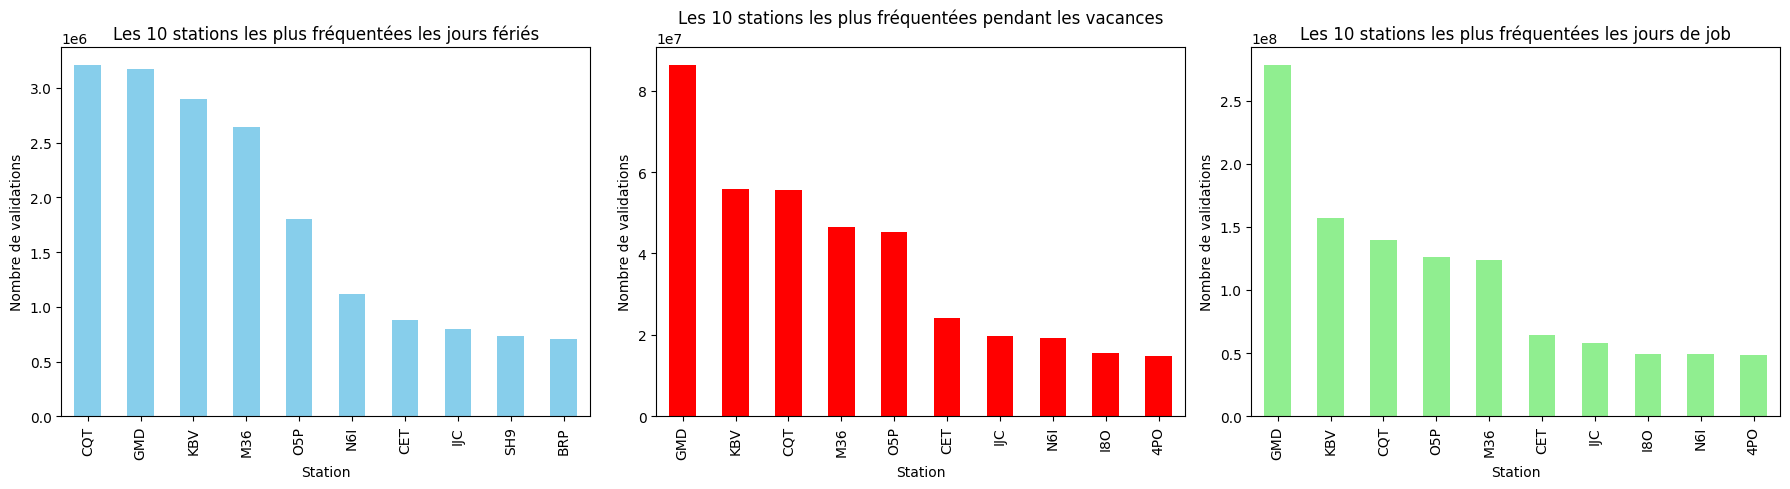

In [6]:

ferie_data = data_train[data_train['ferie'] == 1]
top_10_ferie = ferie_data.groupby('station')['y'].sum().nlargest(10)

vacances_data = data_train[data_train['vacances'] == 1]
top_10_vacances = vacances_data.groupby('station')['y'].sum().nlargest(10)

job_data = data_train[data_train['job'] == 1]
top_10_job = job_data.groupby('station')['y'].sum().nlargest(10)


plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 3)
top_10_job.plot(kind='bar', color='lightgreen')
plt.title('Les 10 stations les plus fréquentées les jours de job')
plt.xlabel('Station')
plt.ylabel('Nombre de validations')


plt.subplot(1, 3, 1)
top_10_ferie.plot(kind='bar', color='skyblue')
plt.title('Les 10 stations les plus fréquentées les jours fériés')
plt.xlabel('Station')
plt.ylabel('Nombre de validations')


plt.subplot(1, 3, 2)
top_10_vacances.plot(kind='bar', color='red')
plt.title('Les 10 stations les plus fréquentées pendant les vacances')
plt.xlabel('Station')
plt.ylabel('Nombre de validations')


plt.tight_layout()
plt.show()

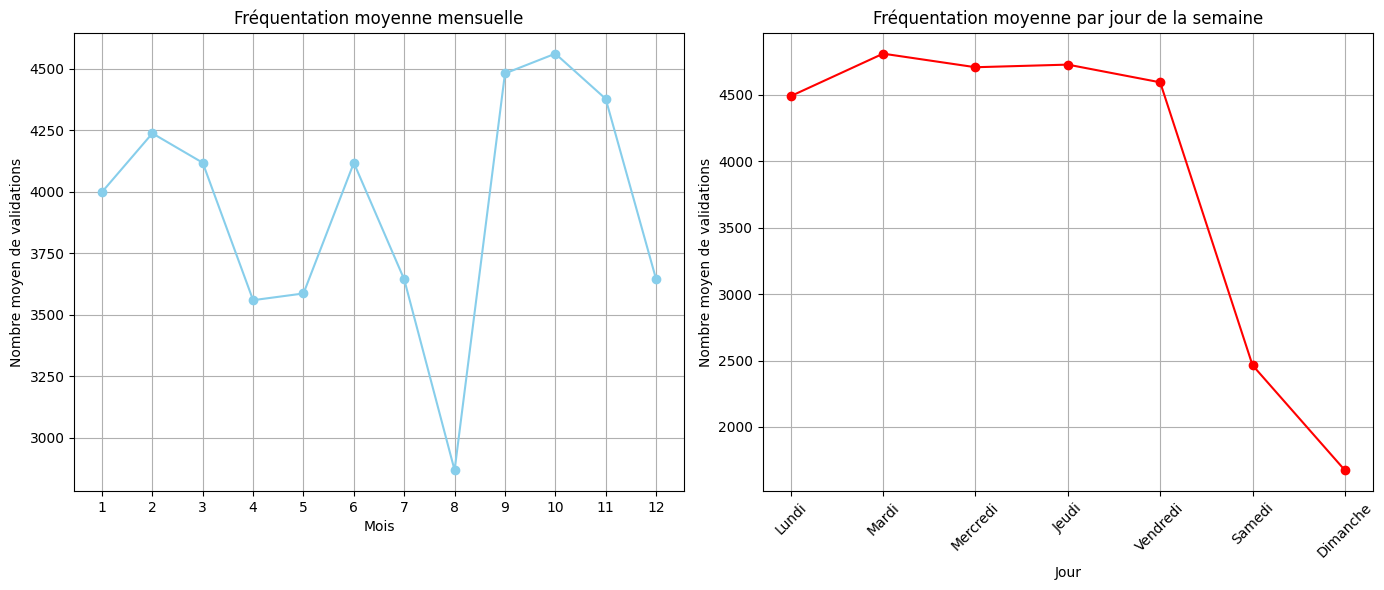

In [7]:

# Assurez-vous que la colonne 'date' est bien de type datetime
data_train['date'] = pd.to_datetime(data_train['date'])

data_train['mois'] = data_train['date'].dt.month
data_train['jour'] = data_train['date'].dt.day_name()

# Créer un dictionnaire pour mapper les jours de la semaine en anglais aux jours en français
jours_traduction = {
    'Monday': 'Lundi',
    'Tuesday': 'Mardi',
    'Wednesday': 'Mercredi',
    'Thursday': 'Jeudi',
    'Friday': 'Vendredi',
    'Saturday': 'Samedi',
    'Sunday': 'Dimanche'
}

data_train['jour'] = data_train['jour'].map(jours_traduction)

data_mensuelles = data_train.groupby('mois')['y'].mean()

data_journalières = data_train.groupby('jour')['y'].mean()

ordre_jours_semaine = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
data_journalières = data_journalières.reindex(ordre_jours_semaine)

plt.figure(figsize=(14, 6))

# Graphique combiné : tendance mensuelle et hebdomadaire
plt.subplot(1, 2, 1)
plt.plot(data_mensuelles.index, data_mensuelles.values, marker='o', linestyle='-', color='skyblue')
plt.title('Fréquentation moyenne mensuelle')
plt.xlabel('Mois')
plt.ylabel('Nombre moyen de validations')
plt.grid(True)
plt.xticks(range(1, 13))

plt.subplot(1, 2, 2)
plt.plot(data_journalières.index, data_journalières.values, marker='o', linestyle='-', color='red')
plt.title('Fréquentation moyenne par jour de la semaine')
plt.xlabel('Jour')
plt.ylabel('Nombre moyen de validations')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Distribution de y**

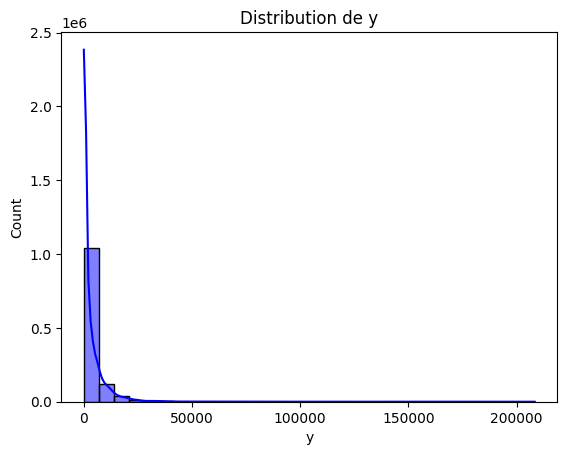

In [8]:

sns.histplot(data_train['y'], kde=True, bins=30, color='blue')
plt.title("Distribution de y")
plt.xlabel("y")
plt.show()

**Gares retirée et ajoutée**

In [9]:



data_train['date'] = pd.to_datetime(data_train['date'],format='%Y-%m-%d')
data_train['annee'] = data_train['date'].dt.year
gares_par_annee = data_train.groupby('annee')['station'].unique()


gares_par_annee_dict = gares_par_annee.to_dict()

gares_disparues = {}
gares_ajoutees = {}

# Comparer les gares d'une année à l'autre
for annee in sorted(gares_par_annee_dict.keys())[:-1]:
    gares_annee_courante = set(gares_par_annee_dict[annee])
    gares_annee_suivante = set(gares_par_annee_dict[annee + 1])

    # Gares disparues
    disparues_cette_annee = gares_annee_courante - gares_annee_suivante
    for gare in disparues_cette_annee:
        if gare not in gares_disparues:
            gares_disparues[gare] = annee

    # Gares ajoutées
    ajoutees_cette_annee = gares_annee_suivante - gares_annee_courante
    for gare in ajoutees_cette_annee:
        if gare not in gares_ajoutees:
            gares_ajoutees[gare] = annee + 1


print("Gares disparues avec leur année de disparition :")
for gare, annee in gares_disparues.items():
    print(f"{gare}: {annee}")

print("\nGares ajoutées avec leur année d'ajout :")
for gare, annee in gares_ajoutees.items():
    print(f"{gare}: {annee}")


Gares disparues avec leur année de disparition :
52H: 2017
EFN: 2019
L58: 2019
TPX: 2019
B9M: 2019
92P: 2019

Gares ajoutées avec leur année d'ajout :
N9K: 2017
OWM: 2017
V2P: 2017
48S: 2017
52H: 2019
EFN: 2022
QD6: 2022
BDC: 2022
W14: 2022
TPX: 2022
L58: 2022
B9M: 2022
W80: 2022
92P: 2022
P6E: 2022


**Prétraitement des données : approche optimal donnant les meilleurs résultats**

In [3]:
from sklearn.preprocessing import LabelEncoder
X_train['index']= X_train['date'] +'_'+ X_train['station']
index_test=X_test['index']
data_train = X_train.merge(Y_train,on = 'index')
d_train = data_train

# numeroté les stations
label_encoder = LabelEncoder()
d_train['station'] = label_encoder.fit_transform(d_train['station'])
X_test['station'] = label_encoder.transform(X_test['station'])

df_train= d_train.drop(columns=['index']) # sans l'index
df_test= X_test.drop(columns=['index']) # sans l'index


# Conversion explicite de la colonne "date" en chaînes de caractères
df_train['date'] = df_train['date'].astype(str)
df_test['date'] = df_test['date'].astype(str)

# Suppression des tirets
df_train['date'] = df_train['date'].str.replace("-", "", regex=False)
df_test['date'] = df_test['date'].str.replace("-", "", regex=False)

# Appliquer la fonction log à y
df_train['y_log'] = np.log1p(df_train['y'])  # log(1 + y) pour éviter log(0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_train.drop(columns=['y','y_log'])
y = df_train['y_log']


# Fonction pour exporter les données de y 
def export(predictions, index_test, filename='predictions.csv'):

    predictions_df = pd.DataFrame({'index': index_test, 'y': predictions})


    predictions_df.to_csv(filename, index=False, sep=',')
    print(f"Predictions exported to {filename} with delimiter ','")

**MODELES**

In [26]:

models = {
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=42),
    "ExtraTreeRegressor": ExtraTreeRegressor(random_state=42),
    "LinearRegression": LinearRegression(),
    "RidgeRegression": Ridge(alpha=1.0),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "BaggingRegressor": BaggingRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42)  
}

# Entraînement et prédiction pour chaque modèle
predictions = {}
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(df_test)
    y_predd = np.expm1(y_pred) # Pour revenir à l'echelle de départ
    predictions[name] = y_predd
    
    print(f"{name}: Prédiction sur X_test = {y_predd[:5]}")

ExtraTreesRegressor: Prédiction sur X_test = [3.63910588 3.08785792 3.25998355 1.79175947 3.63758616]
ExtraTreeRegressor: Prédiction sur X_test = [3.63758616 3.09104245 3.25809654 1.79175947 3.63758616]
LinearRegression: Prédiction sur X_test = [4.70646087 5.1132794  4.83105842 5.07424884 5.22136403]
RidgeRegression: Prédiction sur X_test = [4.70649025 5.11330878 4.83108781 5.07427822 5.22139341]
DecisionTreeRegressor: Prédiction sur X_test = [3.63758616 3.09104245 3.29583687 1.79175947 3.63758616]
RandomForestRegressor: Prédiction sur X_test = [3.60465333 2.94067664 3.24590586 1.88267984 3.69915566]
BaggingRegressor: Prédiction sur X_test = [3.56869335 2.86293936 3.24712309 1.91298663 3.7028953 ]
GradientBoostingRegressor: Prédiction sur X_test = [5.23804033 5.68184293 5.87107997 5.37698526 6.04049333]


**Réseaux de neurones denses**

In [11]:

# reseau neurone
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error

if isinstance(y, pd.Series):
    y = y.to_numpy()

# Normalisation des données
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Définir le modèle
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),  # Couche d'entrée
    Dense(32, activation='relu'),                       # Couche cachée
    Dense(1, activation='linear')                       # Couche de sortie
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


history = model.fit(
    X_scaled, y_scaled,
    epochs=30,
    batch_size=32,
    verbose=1
)

X_test_scaled = scaler_X.transform(df_test)

y_pred_scaled = model.predict(X_test_scaled)

# Inverser la normalisation pour obtenir les valeurs réelles
y_pred = scaler_y.inverse_transform(y_pred_scaled)


Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38434/38434 ━━━━━━━━━━━━━━━━━━━━ 10s 248us/step - loss: 0.9172 - mae: 0.7874
Epoch 2/30
38434/38434 ━━━━━━━━━━━━━━━━━━━━ 9s 233us/step - loss: 0.9004 - mae: 0.7775
Epoch 3/30
38434/38434 ━━━━━━━━━━━━━━━━━━━━ 9s 237us/step - loss: 0.8913 - mae: 0.7718
Epoch 4/30
38434/38434 ━━━━━━━━━━━━━━━━━━━━ 9s 236us/step - loss: 0.8852 - mae: 0.7689
Epoch 5/30
38434/38434 ━━━━━━━━━━━━━━━━━━━━ 9s 233us/step - loss: 0.8816 - mae: 0.7671
Epoch 6/30
38434/38434 ━━━━━━━━━━━━━━━━━━━━ 9s 239us/step - loss: 0.8823 - mae: 0.7673
Epoch 7/30
38434/38434 ━━━━━━━━━━━━━━━━━━━━ 9s 234us/step - loss: 0.8791 - mae: 0.7656
Epoch 8/30
38434/38434 ━━━━━━━━━━━━━━━━━━━━ 9s 241us/step - loss: 0.8776 - mae: 0.7648
Epoch 9/30
38434/38434 ━━━━━━━━━━━━━━━━━━━━ 9s 236us/step - loss: 0.8788 - mae: 0.7653
Epoch 10/30
38434/38434 ━━━━━━━━━━━━━━━━━━━━ 9s 238us/step - loss: 0.8779 - mae: 0.7651
Epoch 11/30
38434/38434 ━━━━━━━━━━━━━━━━━━━━ 9s 233us/step - loss: 0.8767 - mae: 0.7643
Epoch 12/30
38434/38434 ━━━━━━━━━━━━━━━━━━━━ 9s 245

**Recherche des hyperparamètres**

In [9]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import randint

# Initialisation du modèle
model = ExtraTreeRegressor(random_state=42)

# Définition de la distribution des paramètres
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 5),
    'max_features': [None, 'log2'],
    'criterion': ['mse', 'mae','friedman_mse']
}

# Initialisation de RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)

# Entraînement du modèle avec RandomizedSearchCV
random_search.fit(X, y)

# Meilleurs paramètres trouvés
best_params = random_search.best_params_
print("Meilleurs paramètres trouvés :", best_params)

# Meilleur modèle
best_model = random_search.best_estimator_

# Prédiction avec le meilleur modèle
y_pred = best_model.predict(df_test)
y_predd = np.expm1(y_pred)
print("Prédiction sur X_test avec le meilleur modèle =", y_predd[:5])


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
175 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pa

Meilleurs paramètres trouvés : {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Prédiction sur X_test avec le meilleur modèle = [3.63758616 3.09104245 3.25809654 1.79175947 3.63758616]
[CV] END criterion=mae, max_depth=40, max_features=None, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=None, max_

In [10]:

export(y_pred, index_test,'y_pred_optimal.csv')

Predictions exported to y_pred_optimal.csv with delimiter ','
